# Blending with different size

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img_1 = cv2.imread('../data/dog_backpack.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('../data/watermark_no_copy.png')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

In [7]:
img_2 = cv2.resize(img_2, (600, 600))

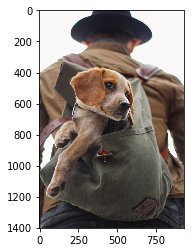

In [8]:
plt.imshow(img_1)

In [9]:
large_img = img_1
small_img = img_2

In [10]:
large_img.shape

(1401, 934, 3)

In [11]:
x_start = large_img.shape[1] - small_img.shape[1]
y_start = large_img.shape[0] - small_img.shape[0]

x_end = x_start + small_img.shape[1]
y_end = y_start + small_img.shape[0]

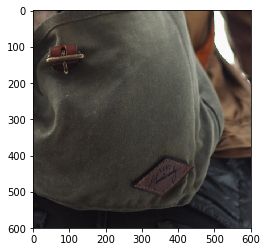

In [12]:
roi = img_1[y_start:y_end, x_start:x_end]
plt.imshow(roi)

## Step 1. making a map

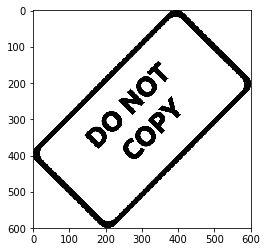

In [13]:
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
plt.imshow(img_2_gray, cmap = 'gray')

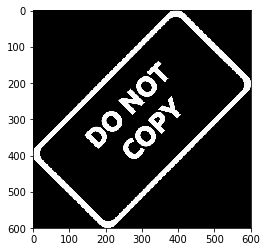

In [14]:
# inverse the color
mask_inv = cv2.bitwise_not(img_2_gray)
plt.imshow(mask_inv, cmap = 'gray')

In [15]:
mask_inv.shape

(600, 600)

There is no channel. So we need to adjust the dimension of the image

## Step 2. Make the map with three dimension

In [16]:
white_img = np.full(img_2.shape, fill_value=255, dtype = np.uint8)
white_img.shape

(600, 600, 3)

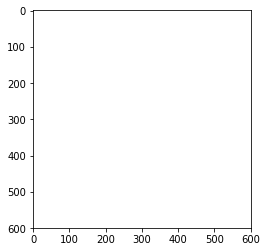

In [17]:
plt.imshow(white_img)

Create a complete white background with the the size of (600, 600, 3) and element-wisely calculate with the mask we made.  Check out [here](https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv)

## Step 3. Map the image on the white image

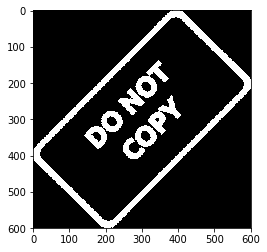

In [18]:
bk = cv2.bitwise_or(white_img, white_img, mask = mask_inv)
plt.imshow(bk)

In [19]:
bk.shape

(600, 600, 3)

Now we the image has three dimension. 

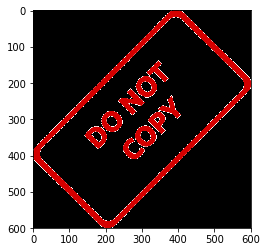

In [20]:
# Map the image on the img_2 
fg = cv2.bitwise_or(img_2, img_2, mask = mask_inv)
plt.imshow(fg)

## Step 4. Blend the two image

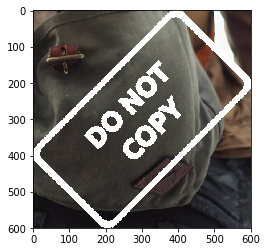

In [21]:
roi_bk = cv2.bitwise_or(roi, bk)
plt.imshow(roi_bk)

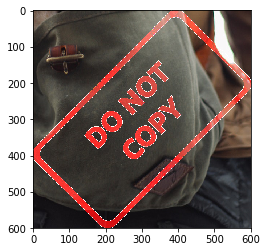

In [22]:
roi_fg = cv2.bitwise_or(roi, fg)
plt.imshow(roi_fg)

## Step 5. Attach the piece into the original image

In [23]:
large_img = img_1
small_img = roi_fg

x_start = large_img.shape[1] - small_img.shape[1]
y_start = large_img.shape[0] - small_img.shape[0]

x_end = x_start + small_img.shape[1]
y_end = y_start + small_img.shape[0]

large_img[y_start:y_end, x_start:x_end] = small_img

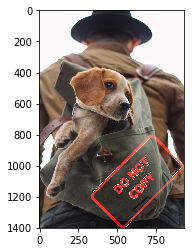

In [24]:
plt.imshow(large_img)